<a href="https://colab.research.google.com/github/sharikar-sneha/YBI_Mileage_Prediction_AIML/blob/main/Milage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mileage Prediction - Regression Analysis.**

# **Source:**
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

# **Data Set Information:**

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinkarn (1993) in predicting the attribute 'mpg", 8 of the original instances were removed because they had unknown values for the 'mpg" attribute. The original dataset is available in the file "auto-mpg.data-original

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

# **Attribute Information:**

1. mpg: continuous

2. cylinders: multi-valued discrete

3. displacement: continuous

4. horsepower, continuous

5. weight: continuous

6. acceleration: continuous

7. model year: multi-valued discrete

8. origin: multi-valued discrete

9. car name: string (unique for each instance)

# **Import Library**

In [4]:
import pandas as pd

In [5]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns

# **Import Data**

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/Dataset/main/MPG.csv')

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# **Data Preprocessing**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [21]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,-0.482619
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,0.551378
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,0.591137
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.447330
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,0.521088
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,-0.257365
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,-0.075409
origin,-0.482619,0.551378,0.591137,0.447330,0.521088,-0.257365,-0.075409,1.000000


# **Remove Missing Values**

In [22]:
df = df.dropna()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    int8   
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), int8(1), object(1)
memory usage: 27.9+ KB


# **Data Visualization**

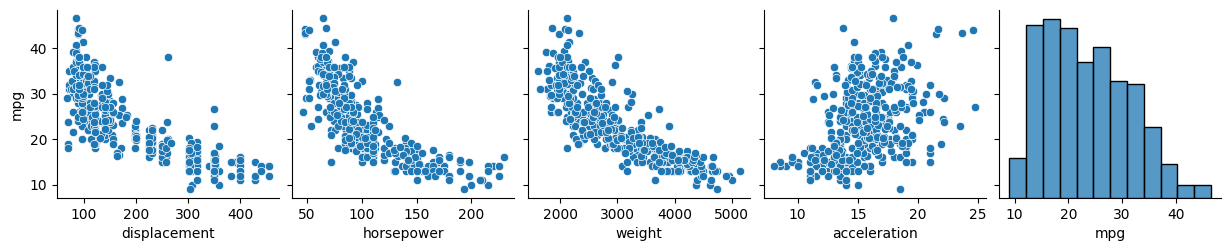

In [24]:
sns.pairplot(df, x_vars=['displacement', 'horsepower', 'weight', 'acceleration', 'mpg'], y_vars=['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

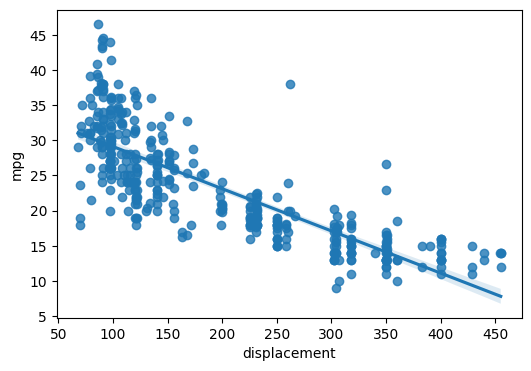

In [26]:
plt.figure(figsize=(6, 4))

# Plot the regression plot
sns.regplot(x='displacement', y='mpg', data=df)

# **Define Target Variable y and Feature x**

In [27]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [29]:
y = df['mpg']

In [30]:
y.shape

(392,)

In [31]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [32]:
x.shape

(392, 4)

In [33]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


# **Scaling Data**

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
ss = StandardScaler()

In [37]:
x = ss.fit_transform(x)

In [38]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [39]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


**After Standardization Mean is Zero and Standard Deviation is One**

# **Train Test Split Data**

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2525)

In [44]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape

((274, 4), (118, 4), (274,), (118,))

# **Linear Regression Model**

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()

In [49]:
lr.fit(x_train, y_train)

LinearRegression()

In [48]:
lr.intercept_

23.6889216106858

In [50]:
lr.coef_

array([-0.13510042, -1.4297211 , -5.23891463,  0.22436094])

### **Mileage = 23.4-1.05Displacemet-1.68Horsepower-4.10Weight 0.115Acceleration + error**

# **Predict Test Data**

In [51]:
y_pred = lr.predict(x_test)

In [52]:
y_pred

array([25.24954801, 26.85525431, 26.58882904, 29.48052754, 23.91216916,
       14.9529791 , 30.0607685 , 34.07634195, 30.550342  , 11.31024173,
       18.14067535, 18.75305197, 29.80678264, 33.19954312, 17.23635872,
       16.06983768, 25.94812038, 21.15777548, 29.92508087, 25.05587641,
       22.85575427, 30.96630956, 22.82202336, 24.04513247, 25.95102384,
       26.21136844, 14.91805111, 31.85928917, 21.95227216, 26.85446824,
        8.94214825, 26.21244694, 30.20552304,  7.15733458, 26.31771126,
       30.54356872, 14.13603243, 31.02810818, 33.19140036, 31.74995879,
       11.07428823, 30.50398808, 29.36195486, 31.022648  , 23.53384962,
       22.87821543, 11.03531446, 14.3757476 , 31.44484893, 26.64255441,
       27.96470623, 21.80486111, 20.32272978, 31.27632871, 24.83127389,
       19.13391479, 28.2786737 , 25.21468804, 26.89045676, 28.76603057,
       19.03600671, 29.49310219, 28.42147856, 26.6112997 ,  7.384747  ,
       20.13152225, 22.77931428, 20.50765035, 32.81875326, 27.92

# **Model Accuracy**

In [53]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [54]:
mean_absolute_error(y_test, y_pred)

3.417654680078563

In [55]:
mean_absolute_percentage_error(y_test, y_pred)

0.16282215595698366

In [56]:
r2_score(y_test, y_pred)

0.6767436309121446

# **Polynomial Regression**

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [59]:
x_train_poly = poly.fit_transform(x_train)


In [60]:
x_test_poly = poly.transform(x_test)

In [61]:
lr.fit(x_train_poly, y_train)

LinearRegression()

In [62]:
lr.intercept_

21.457120355191684

In [63]:
lr.coef_

array([-1.97594907e+00, -5.50639326e+00, -1.82341405e+00, -8.04049934e-01,
        1.55534517e+00, -4.40583099e-01, -5.33735335e-01,  1.29466895e+00,
        2.61553723e-03,  5.86761939e-01])

In [65]:
y_pred_poly = lr.predict(x_test_poly)

# **Model Accuracy**

In [66]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [67]:
mean_absolute_error(y_test, y_pred_poly)


2.924007242447457

In [69]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.1287488133107199

In [70]:
r2_score(y_test, y_pred_poly)

0.7198303534964867